In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import pylab 
import scipy.stats as stats

In [2]:
deprivation_df = pd.read_csv('/Users/Darius/code/willbanny/Location-Analysis/raw_data/File_7_-_All_IoD2019_Scores__Ranks__Deciles_and_Population_Denominators_3.csv')
co_ordinates = pd.read_csv('/Users/Darius/code/willbanny/Location-Analysis/raw_data/lsoa_latlong.csv')

In [31]:
deprivation_df

,lsoa11cd,LSOA name (2011),Local Authority District code (2019),Local Authority District name (2019),Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),Income Rank (where 1 is most deprived),Income Decile (where 1 is most deprived 10% of LSOAs),...,Indoors Sub-domain Rank (where 1 is most deprived),Indoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Outdoors Sub-domain Score,Outdoors Sub-domain Rank (where 1 is most deprived),Outdoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2015 (excluding prisoners),Dependent Children aged 0-15: mid 2015 (excluding prisoners),Population aged 16-59: mid 2015 (excluding prisoners),Older population aged 60 and over: mid 2015 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners)
0,E01000001,City of London 001A,E09000001,City of London,6.208,29199,9,0.007,32831,10,...,16364,5,1.503,1615,1,1296,175,656,465,715
1,E01000002,City of London 001B,E09000001,City of London,5.143,30379,10,0.034,29901,10,...,22676,7,1.196,2969,1,1156,182,580,394,620
2,E01000003,City of London 001C,E09000001,City of London,19.402,14915,5,0.086,18510,6,...,17318,6,2.207,162,1,1350,146,759,445,804
3,E01000005,City of London 001E,E09000001,City of London,28.652,8678,3,0.211,6029,2,...,25218,8,1.769,849,1,1121,229,692,200,683
4,E01000006,Barking and Dagenham 016A,E09000002,Barking and Dagenham,19.837,14486,5,0.117,14023,5,...,14745,5,0.969,4368,2,2040,522,1297,221,1285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32839,E01033764,Liverpool 022E,E08000012,Liverpool,74.468,116,1,0.470,90,1,...,19468,6,0.750,6052,2,2712,540,1584,588,1625
32840,E01033765,Liverpool 061D,E08000012,Liverpool,59.599,945,1,0.362,838,1,...,24583,8,0.283,10977,4,1445,257,902,286,908
32841,E01033766,Liverpool 042G,E08000012,Liverpool,21.895,12842,4,0.099,16430,6,...,1063,1,0.629,7151,3,1054,170,749,135,735
32842,E01033767,Liverpool 050J,E08000012,Liverpool,66.704,422,1,0.396,442,1,...,1026,1,0.417,9286,3,1019,164,655,200,650


In [34]:
assert deprivation_df.isna().sum().sum() == 0

In [6]:
co_ordinates.head()

,lsoa11cd,longitude,latitude
0,E01012007,-1.242226,54.546051
1,E01012085,-1.201889,54.550827
2,E01012005,-1.246558,54.698560
3,E01012084,-1.197905,54.553090
4,E01012002,-1.232586,54.692038


In [7]:
deprivation_df.shape

(32844, 57)

In [8]:
co_ordinates.shape

(42619, 3)

In [35]:
assert co_ordinates.isna().sum().sum() == 0

In [10]:
deprivation_df['LSOA code (2011)']

0        E01000001
1        E01000002
2        E01000003
3        E01000005
4        E01000006
           ...    
32839    E01033764
32840    E01033765
32841    E01033766
32842    E01033767
32843    E01033768
Name: LSOA code (2011), Length: 32844, dtype: object

In [11]:
deprivation_df = deprivation_df.rename(columns={'LSOA code (2011)': 'lsoa11cd'})

In [12]:
deprivation_df.head()

,lsoa11cd,LSOA name (2011),Local Authority District code (2019),Local Authority District name (2019),Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),Income Rank (where 1 is most deprived),Income Decile (where 1 is most deprived 10% of LSOAs),...,Indoors Sub-domain Rank (where 1 is most deprived),Indoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Outdoors Sub-domain Score,Outdoors Sub-domain Rank (where 1 is most deprived),Outdoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2015 (excluding prisoners),Dependent Children aged 0-15: mid 2015 (excluding prisoners),Population aged 16-59: mid 2015 (excluding prisoners),Older population aged 60 and over: mid 2015 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners)
0,E01000001,City of London 001A,E09000001,City of London,6.208,29199,9,0.007,32831,10,...,16364,5,1.503,1615,1,1296,175,656,465,715
1,E01000002,City of London 001B,E09000001,City of London,5.143,30379,10,0.034,29901,10,...,22676,7,1.196,2969,1,1156,182,580,394,620
2,E01000003,City of London 001C,E09000001,City of London,19.402,14915,5,0.086,18510,6,...,17318,6,2.207,162,1,1350,146,759,445,804
3,E01000005,City of London 001E,E09000001,City of London,28.652,8678,3,0.211,6029,2,...,25218,8,1.769,849,1,1121,229,692,200,683
4,E01000006,Barking and Dagenham 016A,E09000002,Barking and Dagenham,19.837,14486,5,0.117,14023,5,...,14745,5,0.969,4368,2,2040,522,1297,221,1285


In [13]:
deprivation_co_ordinates = pd.merge(deprivation_df, co_ordinates, how='inner', on='lsoa11cd')

In [14]:
deprivation_co_ordinates.head()

,lsoa11cd,LSOA name (2011),Local Authority District code (2019),Local Authority District name (2019),Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),Income Rank (where 1 is most deprived),Income Decile (where 1 is most deprived 10% of LSOAs),...,Outdoors Sub-domain Score,Outdoors Sub-domain Rank (where 1 is most deprived),Outdoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2015 (excluding prisoners),Dependent Children aged 0-15: mid 2015 (excluding prisoners),Population aged 16-59: mid 2015 (excluding prisoners),Older population aged 60 and over: mid 2015 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners),longitude,latitude
0,E01000001,City of London 001A,E09000001,City of London,6.208,29199,9,0.007,32831,10,...,1.503,1615,1,1296,175,656,465,715,-0.096276,51.519643
1,E01000002,City of London 001B,E09000001,City of London,5.143,30379,10,0.034,29901,10,...,1.196,2969,1,1156,182,580,394,620,-0.092408,51.519636
2,E01000003,City of London 001C,E09000001,City of London,19.402,14915,5,0.086,18510,6,...,2.207,162,1,1350,146,759,445,804,-0.095964,51.522089
3,E01000005,City of London 001E,E09000001,City of London,28.652,8678,3,0.211,6029,2,...,1.769,849,1,1121,229,692,200,683,-0.073841,51.513031
4,E01000006,Barking and Dagenham 016A,E09000002,Barking and Dagenham,19.837,14486,5,0.117,14023,5,...,0.969,4368,2,2040,522,1297,221,1285,0.088094,51.539194


(array([8036., 9552., 6332., 3852., 2347., 1358.,  854.,  390.,  108.,
          15.]),
 array([ 0.541 ,  9.7604, 18.9798, 28.1992, 37.4186, 46.638 , 55.8574,
        65.0768, 74.2962, 83.5156, 92.735 ]),
 <BarContainer object of 10 artists>)

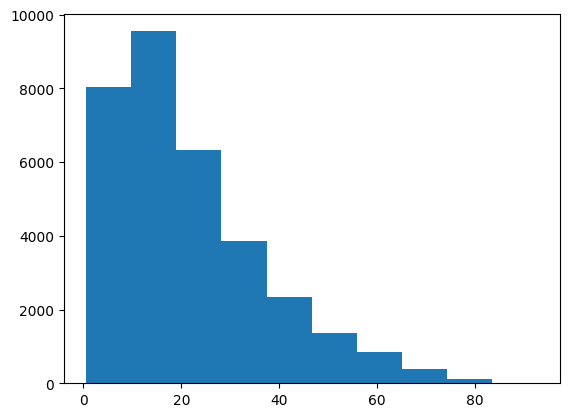

In [19]:
plt.hist(deprivation_co_ordinates['Index of Multiple Deprivation (IMD) Score'])

(array([6.000e+00, 5.400e+01, 3.040e+02, 1.207e+03, 3.063e+03, 5.871e+03,
        7.825e+03, 7.902e+03, 5.204e+03, 1.408e+03]),
 array([-0.614336  , -0.0999278 ,  0.41448039,  0.92888859,  1.44329679,
         1.95770498,  2.47211318,  2.98652137,  3.50092957,  4.01533777,
         4.52974596]),
 <BarContainer object of 10 artists>)

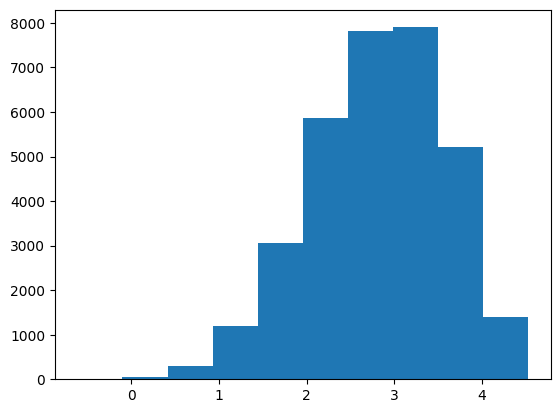

In [20]:
plt.hist(np.log(deprivation_co_ordinates['Index of Multiple Deprivation (IMD) Score']))

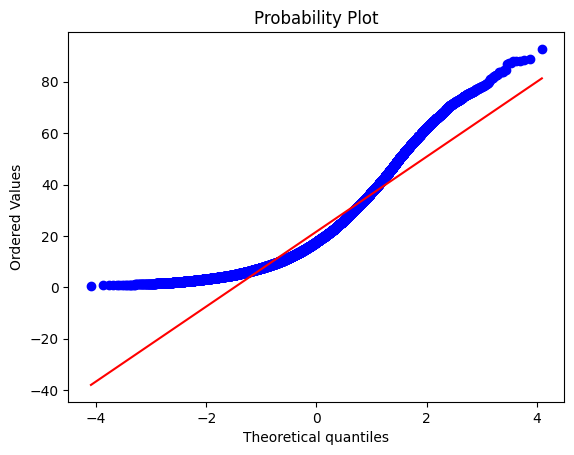

In [21]:
stats.probplot(deprivation_co_ordinates['Index of Multiple Deprivation (IMD) Score'], dist="norm", plot=pylab)
pylab.show()

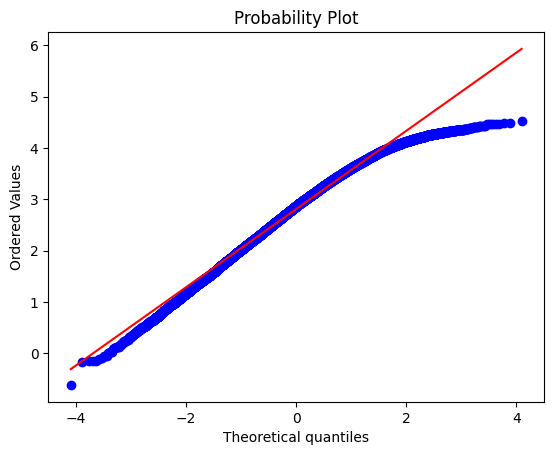

In [22]:
stats.probplot(np.log(deprivation_co_ordinates['Index of Multiple Deprivation (IMD) Score']), dist="norm", plot=pylab)
pylab.show()

(array([3284., 3284., 3285., 3284., 3285., 3284., 3284., 3285., 3284.,
        3285.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

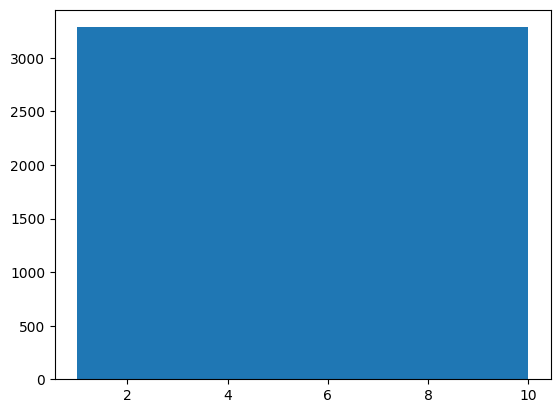

In [23]:
plt.hist(deprivation_co_ordinates['Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)'])


(array([9.928e+03, 9.758e+03, 5.451e+03, 3.470e+03, 2.185e+03, 1.288e+03,
        5.510e+02, 1.590e+02, 4.600e+01, 8.000e+00]),
 array([0.003 , 0.0636, 0.1242, 0.1848, 0.2454, 0.306 , 0.3666, 0.4272,
        0.4878, 0.5484, 0.609 ]),
 <BarContainer object of 10 artists>)

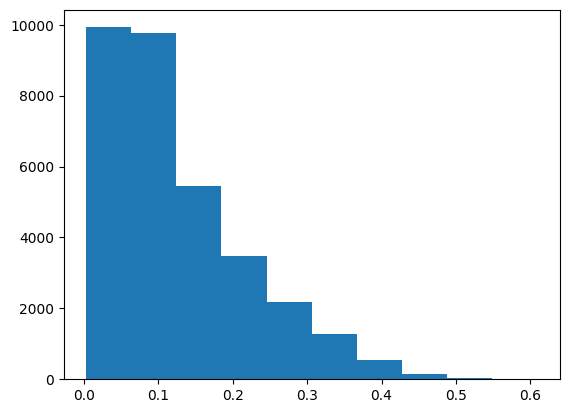

In [24]:
plt.hist(deprivation_co_ordinates['Income Score (rate)'])

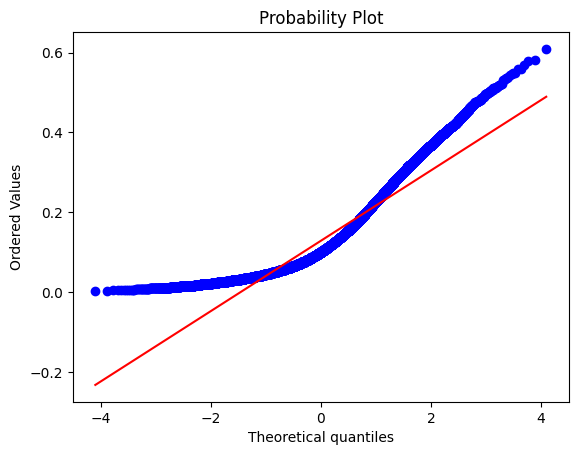

In [25]:
stats.probplot(deprivation_co_ordinates['Income Score (rate)'], dist="norm", plot=pylab)
pylab.show()

(array([1.000e+00, 1.000e+00, 3.470e+02, 3.721e+03, 9.790e+03, 1.044e+04,
        5.563e+03, 2.404e+03, 5.650e+02, 1.200e+01]),
 array([-3.749 , -3.0431, -2.3372, -1.6313, -0.9254, -0.2195,  0.4864,
         1.1923,  1.8982,  2.6041,  3.31  ]),
 <BarContainer object of 10 artists>)

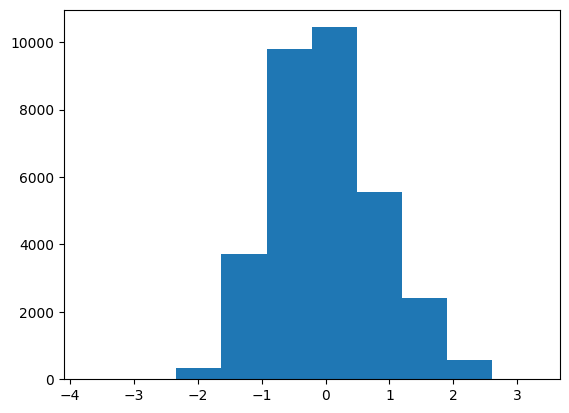

In [26]:
plt.hist(deprivation_co_ordinates['Outdoors Sub-domain Score'])

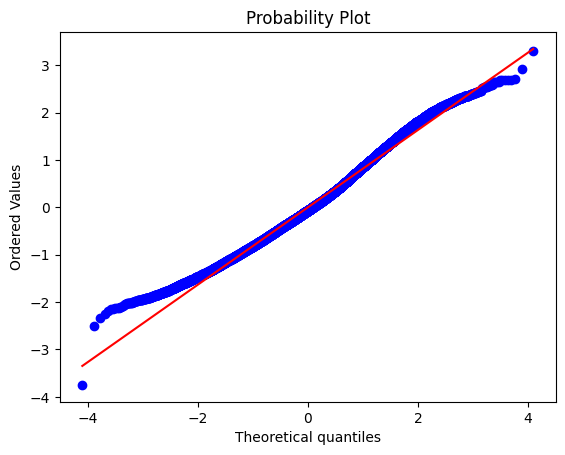

In [27]:
stats.probplot(deprivation_co_ordinates['Outdoors Sub-domain Score'], dist="norm", plot=pylab)
pylab.show()

In [30]:
import os   

deprivation_co_ordinates.to_csv('/Users/Darius/code/willbanny/Location-Analysis/raw_data/deprivation_lsoas_with_co_ordinates.csv')  
